In [11]:
import numpy as np
from icecream import ic
import matplotlib.pyplot as plt


np.set_printoptions(precision=4, suppress=True) 

dh_params = np.array([[  0,        0, 0.342,     0],
                      [ 90,  0.06988,     0,    90],
                      [  0,    0.362,     0,    -90],
                      [  0,    0.380,     0,   180],
                      [-90,        0,     0,    90],
                      [-90,        0, 0.065,   180]])

DEG_TO_RAD = np.pi/180


In [12]:
dh_params

array([[  0.    ,   0.    ,   0.342 ,   0.    ],
       [ 90.    ,   0.0699,   0.    ,  90.    ],
       [  0.    ,   0.362 ,   0.    , -90.    ],
       [  0.    ,   0.38  ,   0.    , 180.    ],
       [-90.    ,   0.    ,   0.    ,  90.    ],
       [-90.    ,   0.    ,   0.065 , 180.    ]])

In [ ]:
class ABBKinematics():
    def __init__(self, dh_matrix : np.array):
        self.dh_matrix = dh_matrix

#! Basic transformations

    def x_translation(self, x : float) -> np.array:
        return np.array([[1, 0, 0, x],
                         [0, 1, 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1]], dtype=float)

    def x_rotation(self, alpha : float) -> np.array:
        return np.array([[1,             0,              0, 0],
                         [0, np.cos(alpha*DEG_TO_RAD), -np.sin(alpha*DEG_TO_RAD), 0],
                         [0, np.sin(alpha*DEG_TO_RAD),  np.cos(alpha*DEG_TO_RAD), 0],
                         [0,             0,              0, 1]], dtype=float)
    
    def z_translation(self, z : float) -> np.array:
        return np.array([[1, 0, 0, 0],
                         [0, 1, 0, 0],
                         [0, 0, 1, z],
                         [0, 0, 0, 1]], dtype=float)
    
    def z_rotation(self, theta: float) -> np.array:
        return np.array([[np.cos(theta*DEG_TO_RAD),-np.sin(theta*DEG_TO_RAD), 0, 0],
                         [np.sin(theta*DEG_TO_RAD), np.cos(theta*DEG_TO_RAD), 0, 0],
                         [            0,             0, 1, 0],
                         [            0,             0, 0, 1]], dtype=float)

#! ------------------------

    def get_fk(self, link_index : int):
        current_origin = np.array([[1, 0, 0, 0],
                                   [0, 1, 0, 0],
                                   [0, 0, 1, 0],
                                   [0, 0, 0, 1]], dtype=float)
        for i in range(link_index):
            current_origin = current_origin @ self.x_rotation(self.dh_matrix[i][0]) @ self.x_translation(self.dh_matrix[i][1])  @ self.z_translation(self.dh_matrix[i][2]) @ self.z_rotation(self.dh_matrix[i][3])            
            
        return current_origin
    
    def get_ik(self):
        pass



In [14]:
solver = ABBKinematics(dh_matrix=dh_params)


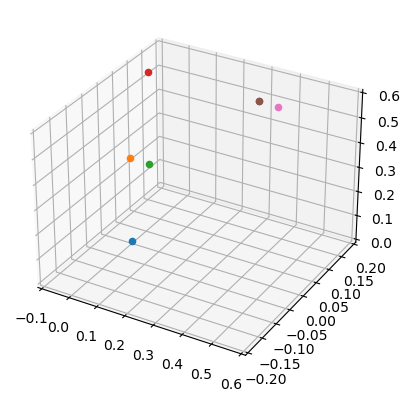

In [17]:
link_0 = solver.get_fk(0)
link_1 = solver.get_fk(1)
link_2 = solver.get_fk(2)
link_3 = solver.get_fk(3)
link_4 = solver.get_fk(4)
link_5 = solver.get_fk(5)
link_6 = solver.get_fk(6)

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(link_0[0][3], link_0[1][3], link_0[2][3],label='points in (x, z)')
ax.scatter(link_1[0][3], link_1[1][3], link_1[2][3],label='points in (x, z)')
ax.scatter(link_2[0][3], link_2[1][3], link_2[2][3],label='points in (x, z)')
ax.scatter(link_3[0][3], link_3[1][3], link_3[2][3],label='points in (x, z)')

ax.set_xlim([-0.1, 0.6])
ax.set_ylim([-0.2, 0.2])
ax.set_zlim([0, 0.6])
ax.scatter(link_4[0][3], link_4[1][3], link_4[2][3],label='points in (x, z)')
ax.scatter(link_5[0][3], link_5[1][3], link_5[2][3],label='points in (x, z)')
ax.scatter(link_6[0][3], link_6[1][3], link_6[2][3],label='points in (x, z)')